In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

After loading the data into the pandas dataframe df, write code to identify the number of rows and columns that df has, and print them.

In [ ]:
df = pd.read_csv('cleveland_heart_attr.csv')

In [ ]:
print('Number of rows = ',df.shape[0])
print('Number of columns = ',df.shape[1])

Number of rows =  303
Number of columns =  14


2. Why are the num major vessels fluroscopy and thal columns considered object types? Write the
reason.


In [ ]:
df.dtypes

age                                       float64
sex                                       float64
chest_pain_type                           float64
rest_bp                                   float64
serum_cholesterol                         float64
fastblood_sugar                           float64
rest_ecg                                  float64
max_heartrate                             float64
exercise_angina                           float64
ST_depression_exercise_relativeto_rest    float64
slope_peak_STsegment                      float64
num_major_vessels_fluroscopy               object
thal                                       object
heart_disease_status                        int64
dtype: object

ANS: the num major vessels fluroscopy and thal columns are object types because both has a mixture of numeric and non numeric values

3. From the histogram on age attribute, identify the number of bins and bin size. Report these quantities

array([[<Axes: title={'center': 'age'}>]], dtype=object)

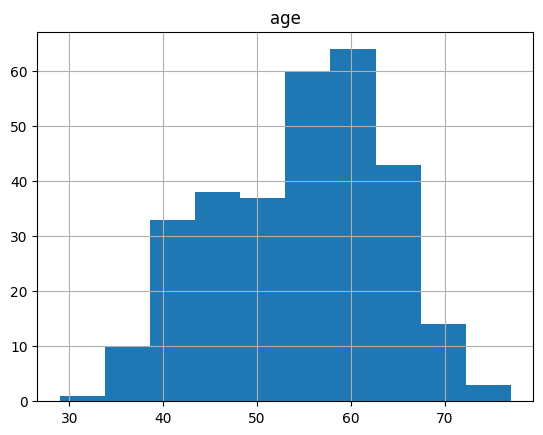

In [ ]:
df.hist(column='age')

In [ ]:
no_of_bins = round(np.sqrt(df.shape[0]))
bin_width = (df['age'].max() - df['age'].min())/no_of_bins


print('Number of bins = ',no_of_bins )
print('bin width = ', bin_width )

Number of bins =  17
bin width =  2.823529411764706


4. Plot the histogram on age attribute for 50 bins and report the bin size and your observations

array([[<Axes: title={'center': 'age'}>]], dtype=object)

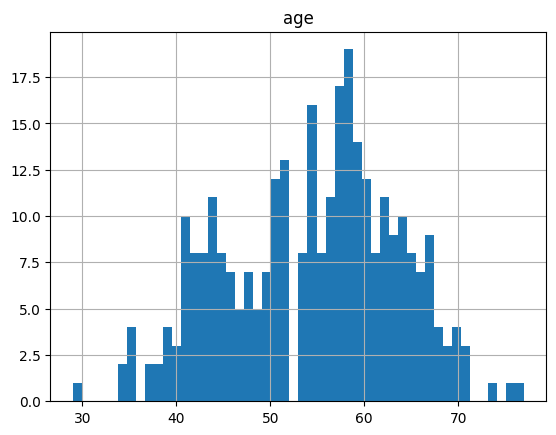

In [ ]:
df.hist(column='age',bins=50)

In [ ]:
print('bin size for 50 bins = ', (df['age'].max() - df['age'].min())/ 50 )

bin size for 50 bins =  0.96


It is observed that  the distribution looks like a “skyscraper” and due to small bin widths , the data is grouped into lots of bins

5. What is the KDE option useful for in histplot()? Explain the details.


 KDE provides a smooth, continuous estimate of the underlying distribution of the data, which can be especially useful for visualizing the shape and smoothness of the data distribution, especially when dealing with continuous data or when we want to get a sense of the underlying probability density

6. Plot pandas based histogram and seaborn based histogram for serum cholesterol at tribute. Use bin
sizes from {default, 20, 50, 100, 200, 500}. For seaborn, use KDE. Report the observations.

array([[<Axes: title={'center': 'serum_cholesterol'}>]], dtype=object)

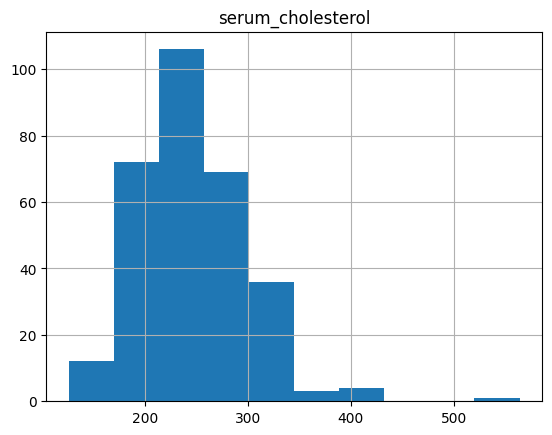

In [ ]:
# DEFAULT
df.hist(column='serum_cholesterol')

bin_size =  20
bin_size =  50
bin_size =  100
bin_size =  200
bin_size =  500


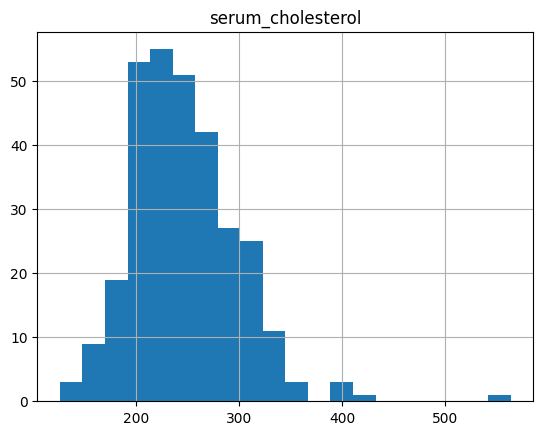

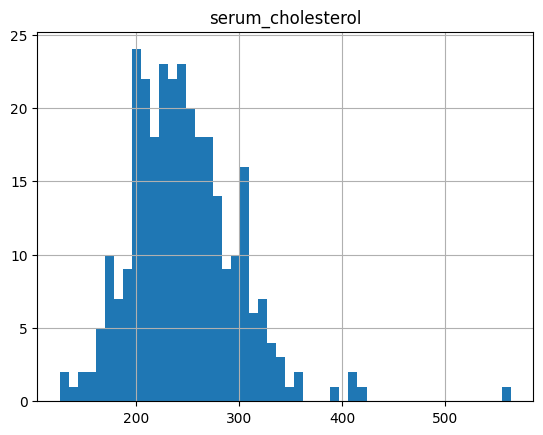

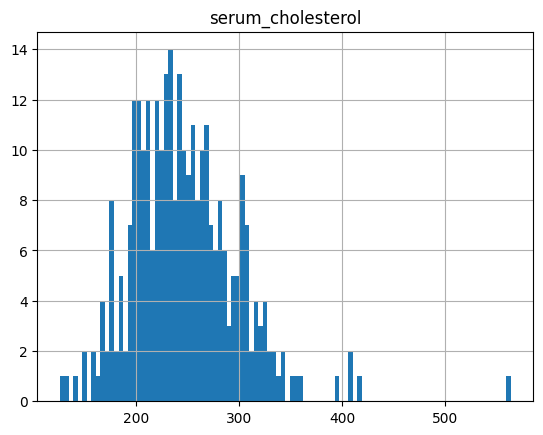

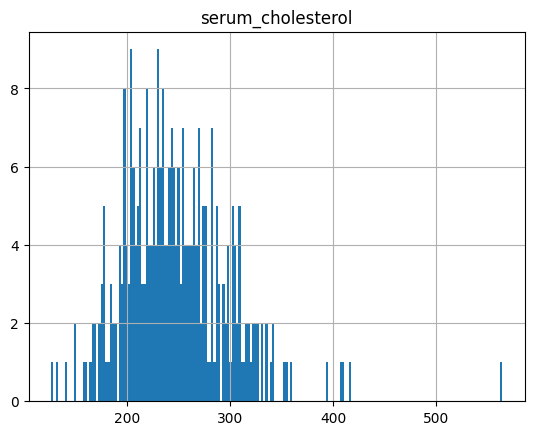

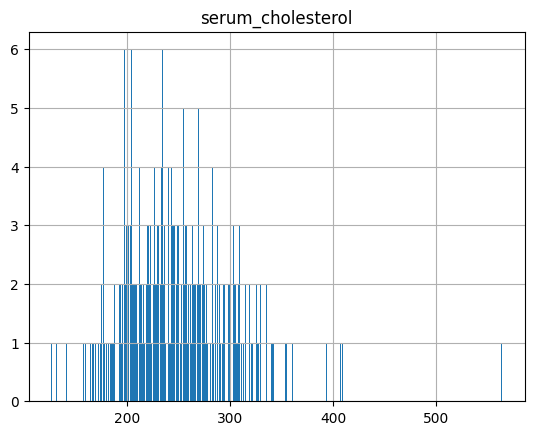

In [ ]:
bin_sizes = [20, 50, 100, 200, 500]
for i in range(5):
  print('bin_size = ',bin_sizes[i])
  df.hist(column='serum_cholesterol',bins=bin_sizes[i])


It is seen that for higher number of bins, it doesnot  give good information about variability in the distribution. So we should avoid histograms with small bin widths that group data into lots of bins.

<Axes: xlabel='serum_cholesterol', ylabel='Count'>

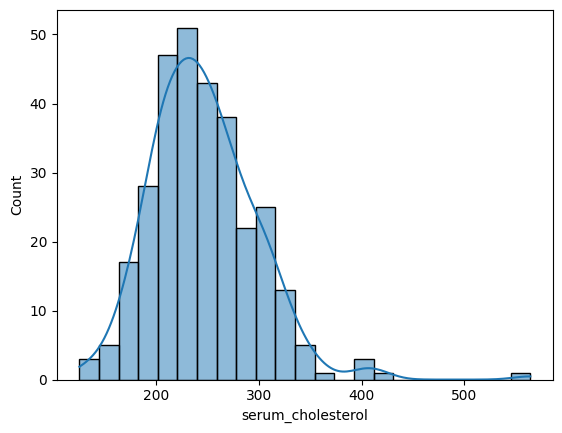

In [ ]:
sns.histplot(df.serum_cholesterol,kde=True)

7. In the plot depicting the histogram of serum cholesterol attribute containing mean and median, add
also the vertical lines to represent the 25 percentile and 75 percentile values in the serum cholesterol
attribute. Use different colors and appropriate legend.


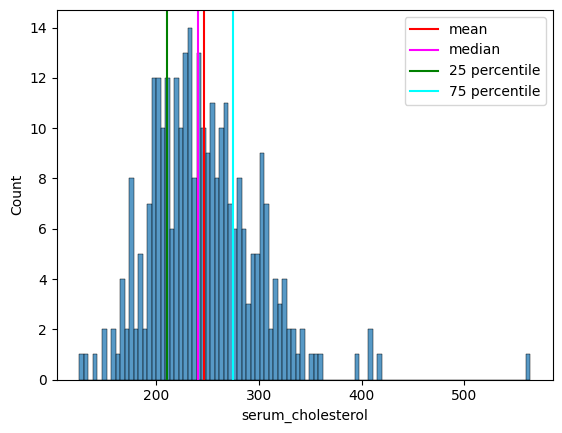

In [ ]:
import matplotlib.pyplot as plt

sns.histplot(df.serum_cholesterol, bins=100)
plt.axvline(x=np.mean(df.serum_cholesterol),color='red',label='mean')
plt.axvline(x=np.median(df.serum_cholesterol),color='magenta',label='median')
plt.axvline(x=np.percentile(df.serum_cholesterol,25),color='green',label='25 percentile')
plt.axvline(x=np.percentile(df.serum_cholesterol,75),color='cyan',label='75 percentile')
plt.legend(loc='upper right')

8. Change the order in the bar plots for gender vs serum cholesterol from male, female to female, male
and replot

In [ ]:
df['gender'] = np.where(df['sex']==1.0,'male','female')

<Axes: xlabel='gender', ylabel='serum_cholesterol'>

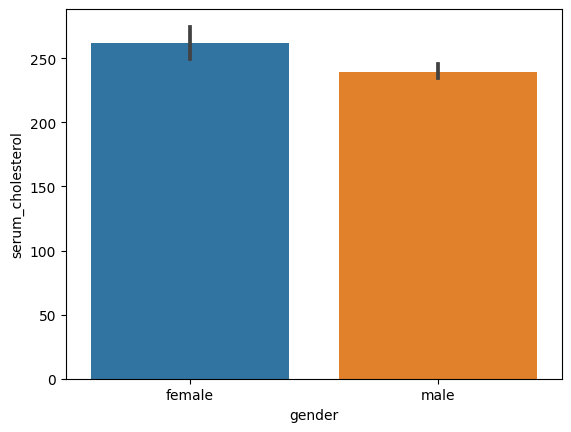

In [ ]:
sns.barplot(x='gender',y="serum_cholesterol",data=df,order=['female','male'])

<Axes: xlabel='gender', ylabel='serum_cholesterol'>

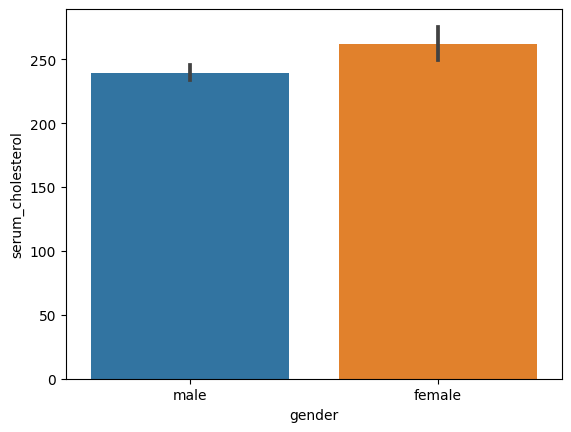

In [ ]:
sns.barplot(x='gender',y="serum_cholesterol",data=df,order=['male','female'])

9. Explain the difference between the bar plot obtained using the median estimator for gender vs
serum cholesterol and the bar plot obtained before.

 In the bar plot obtained using the median estimator ,median is estimated within each categorical bin while in the previous barplot mean is estimated within each categorical bin

10. Explain the observations from the bar plot containing gender vs serum cholesterol grouped according to chest pain type.

<Axes: xlabel='gender', ylabel='serum_cholesterol'>

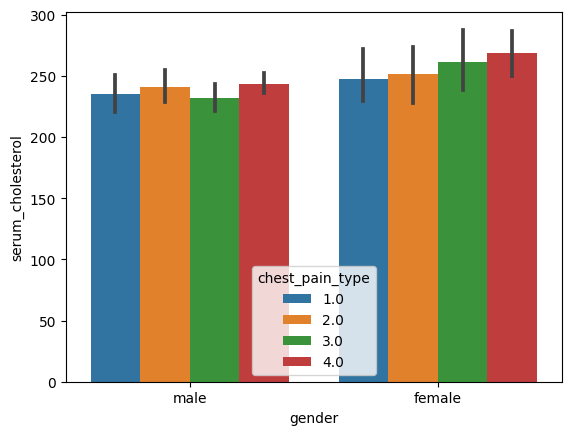

In [ ]:
sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)

It is seen that the people with high serum_cholesterol had the chest pain type '4' and people with low serum_cholesterol had the chest pain type '1'.Also it is seen that the females had higher serum_cholesterol as compared to males




11. Note that the chest pain type attribute is numerical and hence is of less value in the bar plot obtained
for gender vs serum cholesterol grouped according to chest pain type. To make the plot more
meaningful, insert a new column to the dataframe which contains the description according to the
corresponding chest pain type code. Name this column as chest pain type description. To fill the
values in this chest pain type description column, take the description for chest pain type from
description file. Construct the bar plot for gender vs serum cholesterol grouped according to chest
pain type description. Add an appropriate legend and display the legend in a position where the bar
graphs are clearly visible.

In [ ]:
data_description = open('cleveland_heart_attr_description.txt','r').read()
print (data_description)

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 1 database concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
    following location:

     1. Cleveland Clinic Foundation (cleveland.data)

While the database contains 76 attributes, only  14 attributes were actually used in past experiments. 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

1. Title: Heart Disease Databases

2. Source Information:
   (a) Creators: 
       -- 1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
   (b) Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   (c) Date: July, 1988


3. Relevant Information:
     This database contains 76 attributes, but all published experiments
     refer to using a subset of 14 of them.  In particular, the Cleveland
     database is th

In [ ]:

def chest_pain_description_type(value):
    if value == 1:
        return "typical angina"
    elif value == 2:
        return "atypical angina"
    elif value == 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"

df['chest_pain_description_type'] = df['chest_pain_type'].map(chest_pain_description_type)


Text(0, 0.5, 'Serum Cholesterol')

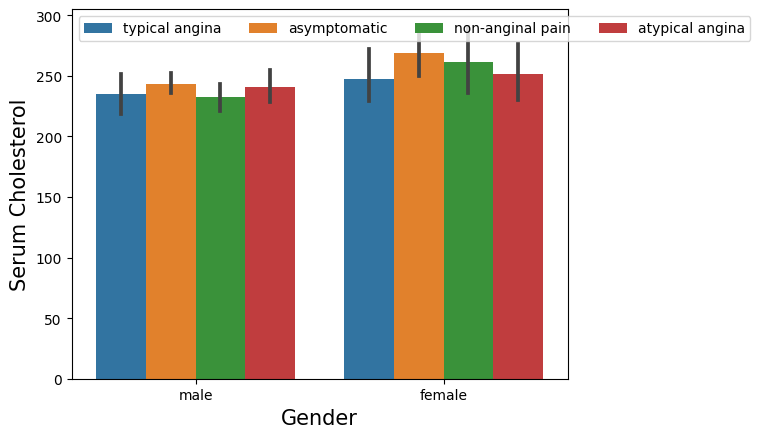

In [ ]:
ax = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_description_type",data=df)
ax.legend(loc='upper left', ncol=4)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Serum Cholesterol",fontsize=15)


12. Add an appropriate annotation indicating the value of the upper boundary values of the bar plots in
the gender vs serum cholesterol grouped according to chest pain type.


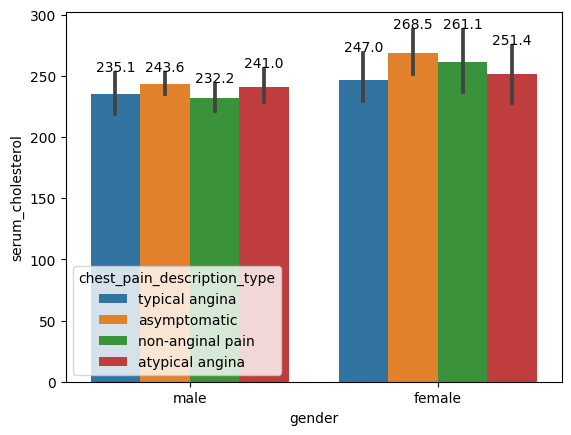

In [ ]:
plot = sns.barplot(x="gender",y="serum_cholesterol",hue ="chest_pain_description_type" ,data=df)


for p,line in zip(plot.patches, plot.lines):
    plot.annotate(format(p.get_height(),'.1f'),
                   (p.get_x() + p.get_width() / 2., line.get_ydata()[1]),
                   ha = 'center', va = 'top',
                   xytext = (0, 9),
                   textcoords = 'offset points')

13. Add an appropriate annotation with pointed arrows and with textual description in bar plot of gender
vs ser

Text(1.7, 296.87631578947367, 'In females, the people having typical angina , have lowest cholestrol !')

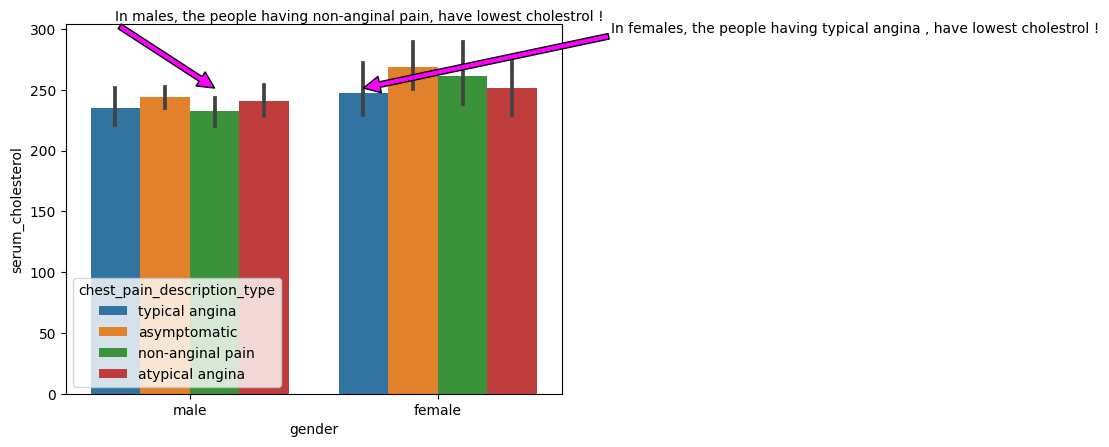

In [ ]:
plot = sns.barplot(x="gender",y="serum_cholesterol",hue='chest_pain_description_type',data=df)

x=plot.patches[0].get_x() + plot.patches[0].get_width() / 2.
y=plot.lines[0].get_ydata()[1]
plt.annotate('In males, the people having non-anginal pain, have lowest cholestrol !', xy=(x+0.4,y), xytext=(x,y+55.5), arrowprops=dict(facecolor='magenta'))
plt.annotate('In females, the people having typical angina , have lowest cholestrol !', xy=(x+1,y), xytext=(x+2,y+45.5), arrowprops=dict(facecolor='magenta'))

14. Explain your observations from the scatter plot obtained for age vs serum cholesterol.

<Axes: xlabel='age', ylabel='serum_cholesterol'>

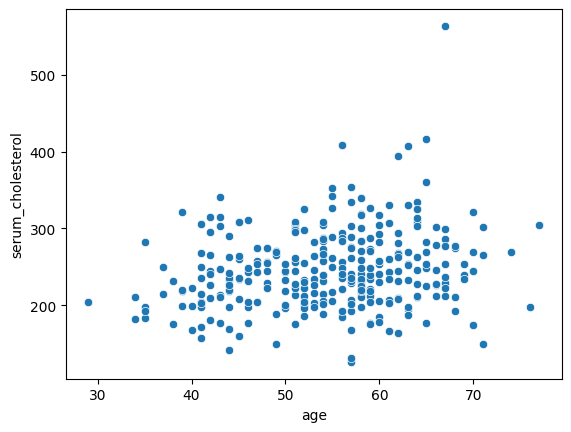

In [ ]:
sns.scatterplot(x="age",y="serum_cholesterol",data=df)

It is seen that after age 35 the serum cholestrol increases and after that it somewhat seems independent of age

15. What does light-colored bands and the dark central line indicate for age vs serum cholesterol plot?


<Axes: xlabel='age', ylabel='serum_cholesterol'>

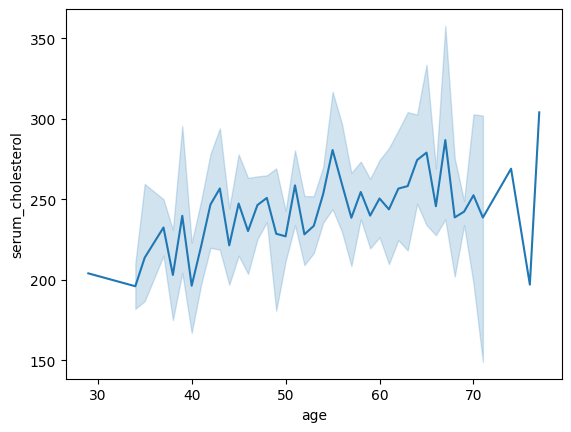

In [ ]:
sns.lineplot(x="age",y="serum_cholesterol",data=df)

The darker blue line represents the mean value of serum cholestrol at each age while the lighter blue line represents a statistic called the 95% confidence interval. The confidence interval depends on both the sample size and the variance of the data itself.

16. What do the upper and lower boundaries of the box of chest pain type and serum cholesterol
indicate? What does the line inside the box indicate? What are the points marked beyond the error
bars? Explain.


<Axes: xlabel='chest_pain_type', ylabel='serum_cholesterol'>

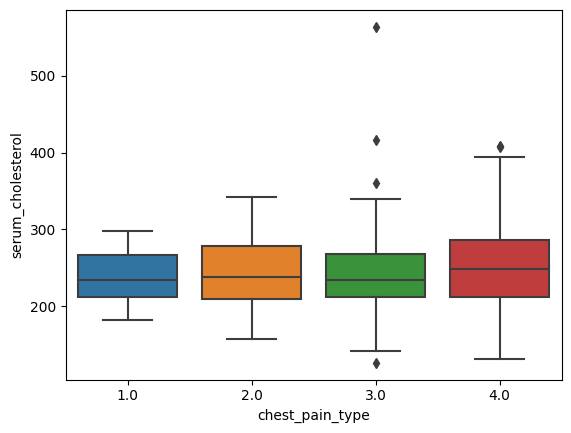

In [ ]:
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",data=df)

Q1 = first quartile , Q3 = third quartile

The lower boundary indicated the The lowest point of the lower whisker given by Q1 - 1.5 * (Q3-Q1).     
     
The lower boundary indicated the The lowest point of the lower whisker given by Q1 - 1.5 * (Q3-Q1).

The line inside the box indicates the median value of serum cholestrol for each chest pain type.

The points marked beyond the error bars are Outliers. These are normally recognized as asterisks and are points that are greater than 1.5 times the interquartile distance from each quartile. Each point that qualifies will have an asterisk



17. Discuss the observations made from the box plot for chest pain type and serum cholesterol grouped
according to gender.

<Axes: xlabel='chest_pain_type', ylabel='serum_cholesterol'>

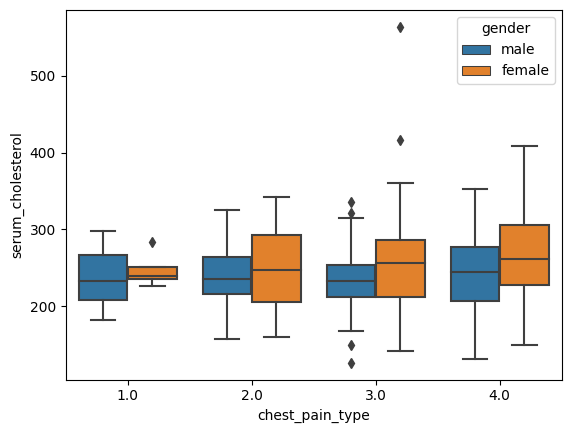

In [ ]:
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",hue="gender",data=df)

From the box plot , it is seen that the fewer females have chest pain type 1 as compared to other chest pains Also the median value for serum cholestrol is higher in females as compared to males.

8. Use violin plot to plot the relationship between chest pain type and serum cholesterol and discuss
the observations. Group the violinplots based on gender information and discuss the observations.



<Axes: xlabel='chest_pain_type', ylabel='serum_cholesterol'>

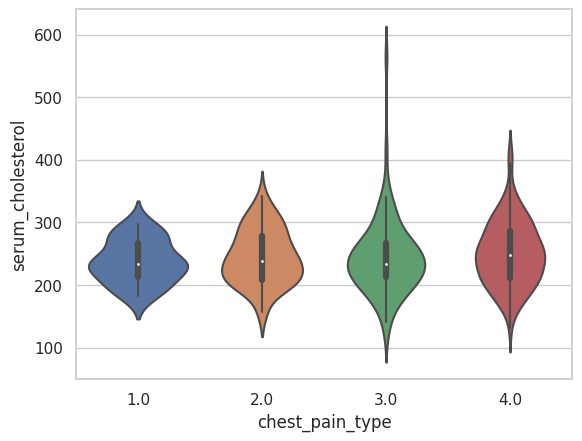

In [ ]:
sns.set(style = 'whitegrid')
tip = sns.load_dataset('tips')

sns.violinplot(x ='chest_pain_type', y ='serum_cholesterol', data = df)

<Axes: xlabel='chest_pain_type', ylabel='serum_cholesterol'>

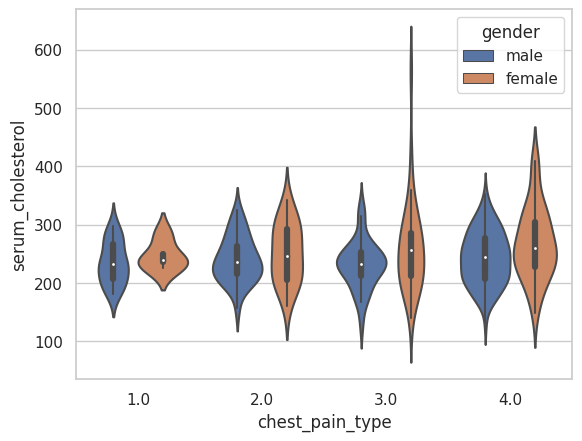

In [ ]:
sns.violinplot(x ='chest_pain_type', y ='serum_cholesterol', hue="gender", data=df)